In [1]:
from google.colab import drive
drive.mount("/content/drive")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
pip install python-igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 55.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import os
import zipfile
from itertools import compress
import igraph as ig
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy.spatial.distance import pdist, squareform

In [ ]:
# General upload of data

# --- Function to extract a ZIP file to a target directory ---
def extract_zip(zip_file_path, extract_to_dir):
    if os.path.exists(zip_file_path):
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_dir)
        print(f"✅ Extracted: {zip_file_path} → {extract_to_dir}")
    else:
        print(f"❌ File not found: {zip_file_path}")

# --- Function to get sorted list of Excel files containing "Actor" in filename ---
def get_filtered_files(directory):
    files = os.listdir(directory)
    filtered = list(compress(files, pd.Series(files).str.contains("Actor")))
    return sorted(filtered)

# --- Setup directories and ZIP paths ---
base_dir = '/content'
savognin_dir = os.path.join(base_dir, 'Savognin')
sedrun_dir = os.path.join(base_dir, 'Sedrun')

savognin_base_dir = '/content/Savognin' #important to define
sedrun_base_dir = '/content/Sedrun'

os.makedirs(savognin_dir, exist_ok=True)
os.makedirs(sedrun_dir, exist_ok=True)

zip_paths = [
    ('/content/drive/MyDrive/Data Paper /Savognin_final.zip', savognin_dir),
    ('/content/drive/MyDrive/Data Paper /Sedrun_final.zip', sedrun_dir)
]

# --- Extract ZIPs ---
for zip_file, target_dir in zip_paths:
    extract_zip(zip_file, target_dir)

# --- List and filter Excel files ---
list_cleaned_savognin = get_filtered_files(savognin_dir)
list_cleaned_sedrun = get_filtered_files(sedrun_dir)

# --- Print results ---
print("📂 Savognin files:", list_cleaned_savognin)
print("📂 Sedrun files:", list_cleaned_sedrun)


In [ ]:
# Check each Dataframe by looping trough list_cleaned_savognin and list_cleaned_sedrun

def preview_dataframes(file_list, base_dir, label):
    for file in file_list:
        file_path = os.path.join(base_dir, file)
        try:
            df = pd.read_excel(file_path)
            actor_name = os.path.splitext(file)[0].strip().title()
            print(f"\n📄 Full DataFrame for {label} Actor: {actor_name}")
            display(df)
            print("-" * 60)
        except Exception as e:
            print(f"❌ Error displaying {file}: {e}")

# Preview all DataFrames
preview_dataframes(list_cleaned_savognin, '/content/Savognin', 'Savognin')
preview_dataframes(list_cleaned_sedrun, '/content/Sedrun', 'Sedrun')



📄 Full DataFrame for Savognin Actor: Actor 1


,Actor 1,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process)
0,Actor 1,5.0,5,1.0,1,5.0,5,5.0,5,5.0,5,5.0,5,5.0,5,NaN,NA
1,Actor 2,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
2,Actor 3,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
3,Actor 4,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
4,Actor 5,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
5,Actor 6,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
6,Actor 7,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
7,Actor 8,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA


------------------------------------------------------------

📄 Full DataFrame for Savognin Actor: Actor 2


,Actor 2,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process)
0,Actor 1,NaN,NA,1.0,1,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
1,Actor 2,1.0,1,1.0,1,1.0,1,NaN,NA,5.0,5,0.0,0,5.0,5,NaN,NA
2,Actor 3,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
3,Actor 4,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
4,Actor 5,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
5,Actor 6,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
6,Actor 7,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
7,Actor 8,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA


------------------------------------------------------------

📄 Full DataFrame for Savognin Actor: Actor 3A


,Actor 3_a,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process)
0,Actor 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Actor 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Actor 3,1.0,1,1.0,1,1.0,1,5.0,5,5.0,5,1.0,1,5.0,5,5.0,5
3,Actor 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Actor 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Actor 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Actor 7,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
7,Actor 8,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA


------------------------------------------------------------

📄 Full DataFrame for Savognin Actor: Actor 3B


,Actor 3_b,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process)
0,Actor 1,NA,NA,1,1,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
1,Actor 2,NA,NA,NA,NA,1,1,NA,NA,NA,NA,0,0,NA,NA,NA,NA
2,Actor 3,5,1,5,1,1,1,NaN,NA,0,0,1,1,5,5,1,1
3,Actor 4,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN
4,Actor 5,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN
5,Actor 6,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN
6,Actor 7,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN
7,Actor 8,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN


------------------------------------------------------------

📄 Full DataFrame for Savognin Actor: Actor 3C


,Actor 3_c,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process)
0,Actor 1,1,1,1,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Actor 2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Actor 3,1,1,1,1,1,1,NaN,NaN,1,1,5,5,5,5,1,1
3,Actor 4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,NA,NA
4,Actor 5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,Actor 6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,Actor 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Actor 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------------------

📄 Full DataFrame for Savognin Actor: Actor 4


,Actor 4,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process)
0,Actor 1,1.0,1,1.0,1,5.0,5,5.0,5,0.0,5,0.0,0,5.0,5,NaN,NA
1,Actor 2,5.0,5,5.0,5,1.0,1,5.0,5,0.0,5,0.0,0,5.0,5,NaN,NA
2,Actor 3,1.0,1,5.0,1,5.0,1,5.0,5,0.0,5,0.0,0,5.0,5,NaN,NaN
3,Actor 4,5.0,5,1.0,1,5.0,5,5.0,5,0.0,0,0.0,0,0.0,0,5.0,5
4,Actor 5,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
5,Actor 6,5.0,5,5.0,5,5.0,5,5.0,5,0.0,5,0.0,0,5.0,5,NaN,NaN
6,Actor 7,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
7,Actor 8,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA


------------------------------------------------------------

📄 Full DataFrame for Savognin Actor: Actor 6


,Actor 6,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process)
0,Actor 1,5.0,5,1.0,1,5.0,5,NaN,NA,5.0,5,5.0,5,NaN,NA,NaN,NA
1,Actor 2,1.0,1,1.0,1,1.0,1,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
2,Actor 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Actor 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Actor 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Actor 6,5.0,5,5.0,5,5.0,5,NaN,NaN,0.0,0,0.0,0,0.0,0,NaN,NaN
6,Actor 7,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
7,Actor 8,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA


------------------------------------------------------------

📄 Full DataFrame for Savognin Actor: Actor 8


,Actor 8,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process)
0,Actor 1,5.0,1,1.0,1,NA,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
1,Actor 2,NaN,NA,NaN,NA,NaN,NaN,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
2,Actor 3,1.0,1,5.0,1,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
3,Actor 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NA,NaN,NA
4,Actor 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Actor 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Actor 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Actor 8,0.0,0,1.0,1,0,0,5.0,5,0.0,0,0.0,0,0.0,0,0.0,0


------------------------------------------------------------

📄 Full DataFrame for Sedrun Actor: Actor 1


,Actor 1,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process)
0,Actor 1,5.0,5,5.0,5,5.0,0,5.0,5,0.0,0,5.0,5,0.0,0,NaN,NA
1,Actor 2,NaN,NaN,NaN,NaN,1.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Actor 3,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
3,Actor 4,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
4,Actor 5,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
5,Actor 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NA
6,Actor 7,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
7,Actor 8,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA


------------------------------------------------------------

📄 Full DataFrame for Sedrun Actor: Actor 3


,Actor 3,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process)
0,Actor 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Actor 2,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Actor 3,5.0,0.0,5.0,5.0,5.0,5.0,NaN,NA,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0
3,Actor 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Actor 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Actor 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Actor 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Actor 8,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------------------

📄 Full DataFrame for Sedrun Actor: Actor 4


,Actor 4,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process)
0,Actor 1,5,5,1,1,5,5,5,5,5,5,5,5,0,0,NA,NaN
1,Actor 2,5,5,5,5,5,0,5,5,5,5,5,0,5,5,NaN,NaN
2,Actor 3,1,5,1,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Actor 4,5,0,1,1,5,0,5,5,0,0,0,0,0,0,0,0
4,Actor 5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,NaN,NaN
5,Actor 6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,NaN,NaN
6,Actor 7,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,Actor 8,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


------------------------------------------------------------

📄 Full DataFrame for Sedrun Actor: Actor 5


,Actor 5,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process)
0,Actor 1,NA,NA,1.0,1,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
1,Actor 2,NA,NaN,1.0,1,5,0,NA,NaN,NA,NaN,5,0,NaN,NaN,NaN,NaN
2,Actor 3,5,5,1.0,1,5,5,NA,NaN,0,0,NA,NaN,NA,NaN,NA,NaN
3,Actor 4,NA,NaN,1.0,1,NA,NaN,NA,NaN,NA,NaN,NA,NaN,5,5,0,0
4,Actor 5,5,0,1.0,1,5,5,5,5,0,0,0,0,0,0,0,0
5,Actor 6,NA,NaN,1.0,1,NA,NaN,NA,NaN,NA,NaN,NA,NaN,5,5,NaN,NaN
6,Actor 7,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA
7,Actor 8,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA


------------------------------------------------------------


In [ ]:
 # Figure 1--- Utilities for First-Order Perceptions Processing ---

def get_filtered_files(path):
    """Return sorted list of Excel files containing 'Actor' in filename."""
    return sorted([f for f in os.listdir(path) if "Actor" in f and f.endswith('.xlsx')])

def extract_actor_name(filename):
    """Extract and lowercase actor name from filename (e.g., 'Actor 3a.xlsx' → 'actor 3a')."""
    return os.path.splitext(filename)[0].strip().lower()

def simplify_actor_name(name):
    """Simplify actor name by removing trailing letters (e.g., 'actor 3a' → 'actor 3')."""
    parts = name.split()
    return f"{parts[0]} {parts[1][:-1]}" if len(parts) == 2 and parts[1][-1].isalpha() else name

def select_row_by_actor_name(df, actor_name):
    """Return the row from the DataFrame that matches the simplified actor name."""
    try:
        df = df.set_index(df.columns[0])
        df.index = df.index.str.strip().str.lower()
        return df.loc[actor_name]
    except KeyError:
        print(f"⚠️ Actor row '{actor_name}' not found. Index values: {list(df.index)}")
        return None

def process_files(file_list, folder):
    """Process Excel files: extract rows where filename matches a row index."""
    selected, labels = [], []
    for file in file_list:
        try:
            df = pd.read_excel(os.path.join(folder, file))
            actor_raw = extract_actor_name(file)
            actor = simplify_actor_name(actor_raw)
            row = select_row_by_actor_name(df, actor)
            if row is not None:
                selected.append(row)
                labels.append(actor_raw.title())
        except Exception as e:
            print(f"❌ Failed to process {file}: {e}")
    return pd.DataFrame(selected, index=labels)

def extract_before_after_columns(df):
    """Split DataFrame into 'before' and 'after' perception columns."""
    before = df.loc[:, df.columns.str.contains("before", case=False)]
    after  = df.loc[:, df.columns.str.contains("after", case=False)]
    return before, after

# --- Run Processing ---

# Get Excel file lists
list_cleaned_savognin = get_filtered_files('/content/Savognin/')
list_cleaned_sedrun   = get_filtered_files('/content/Sedrun/')

# Process each region's Excel files
savognin_df = process_files(list_cleaned_savognin, '/content/Savognin')
sedrun_df   = process_files(list_cleaned_sedrun, '/content/Sedrun')

# Extract before/after data
savognin_before, savognin_after = extract_before_after_columns(savognin_df)
sedrun_before, sedrun_after     = extract_before_after_columns(sedrun_df)

# --- Display Results ---

print("📌 Savognin – Before Process:")
display(savognin_before)
print("📌 Savognin – After Process:")
display(savognin_after)

print("📌 Sedrun – Before Process:")
display(sedrun_before)
print("📌 Sedrun – After Process:")
display(sedrun_after)

📌 Savognin – Before Process:


,Biodiversity (before process),Landscape (before process),Agriculture (before process),Hydropower (before process),Energy security (before process),Finances (before process),Employment (before process),Status Quo of power relations (before process)
Actor 1,5.0,1.0,5.0,5.0,5.0,5.0,5.0,NaN
Actor 2,1.0,1.0,1.0,NaN,5.0,0.0,5.0,NaN
Actor 3A,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0
Actor 3B,5.0,5.0,1.0,NaN,0.0,1.0,5.0,1.0
Actor 3C,1.0,1.0,1.0,NaN,1.0,5.0,5.0,1.0
Actor 4,5.0,1.0,5.0,5.0,0.0,0.0,0.0,5.0
Actor 6,5.0,5.0,5.0,NaN,0.0,0.0,0.0,NaN
Actor 8,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0


📌 Savognin – After Process:


,Biodiversity (after process),Landscape (after process),Agriculture (after process),Hydropower (after process),Energy security (after process),Finances (after process),Employment (after process),Status Quo of power relations (after process)
Actor 1,5,1,5,5,5,5,5,NA
Actor 2,1,1,1,NA,5,0,5,NA
Actor 3A,1,1,1,5,5,1,5,5
Actor 3B,1,1,1,NA,0,1,5,1
Actor 3C,1,1,1,NaN,1,5,5,1
Actor 4,5,1,5,5,0,0,0,5
Actor 6,5,5,5,NaN,0,0,0,NaN
Actor 8,0,1,0,5,0,0,0,0


📌 Sedrun – Before Process:


,Biodiversity (before process),Landscape (before process),Agriculture (before process),Hydropower (before process),Energy security (before process),Finances (before process),Employment (before process),Status Quo of power relations (before process)
Actor 1,5.0,5.0,5.0,5.0,0.0,5.0,0.0,NaN
Actor 3,5.0,5.0,5.0,NaN,0.0,5.0,5.0,5.0
Actor 4,5.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0
Actor 5,5.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0


📌 Sedrun – After Process:


,Biodiversity (after process),Landscape (after process),Agriculture (after process),Hydropower (after process),Energy security (after process),Finances (after process),Employment (after process),Status Quo of power relations (after process)
Actor 1,5.0,5.0,0.0,5,0.0,5.0,0.0,NA
Actor 3,0.0,5.0,5.0,NA,0.0,5.0,5.0,5.0
Actor 4,0.0,1.0,0.0,5,0.0,0.0,0.0,0
Actor 5,0.0,1.0,5.0,5,0.0,0.0,0.0,0


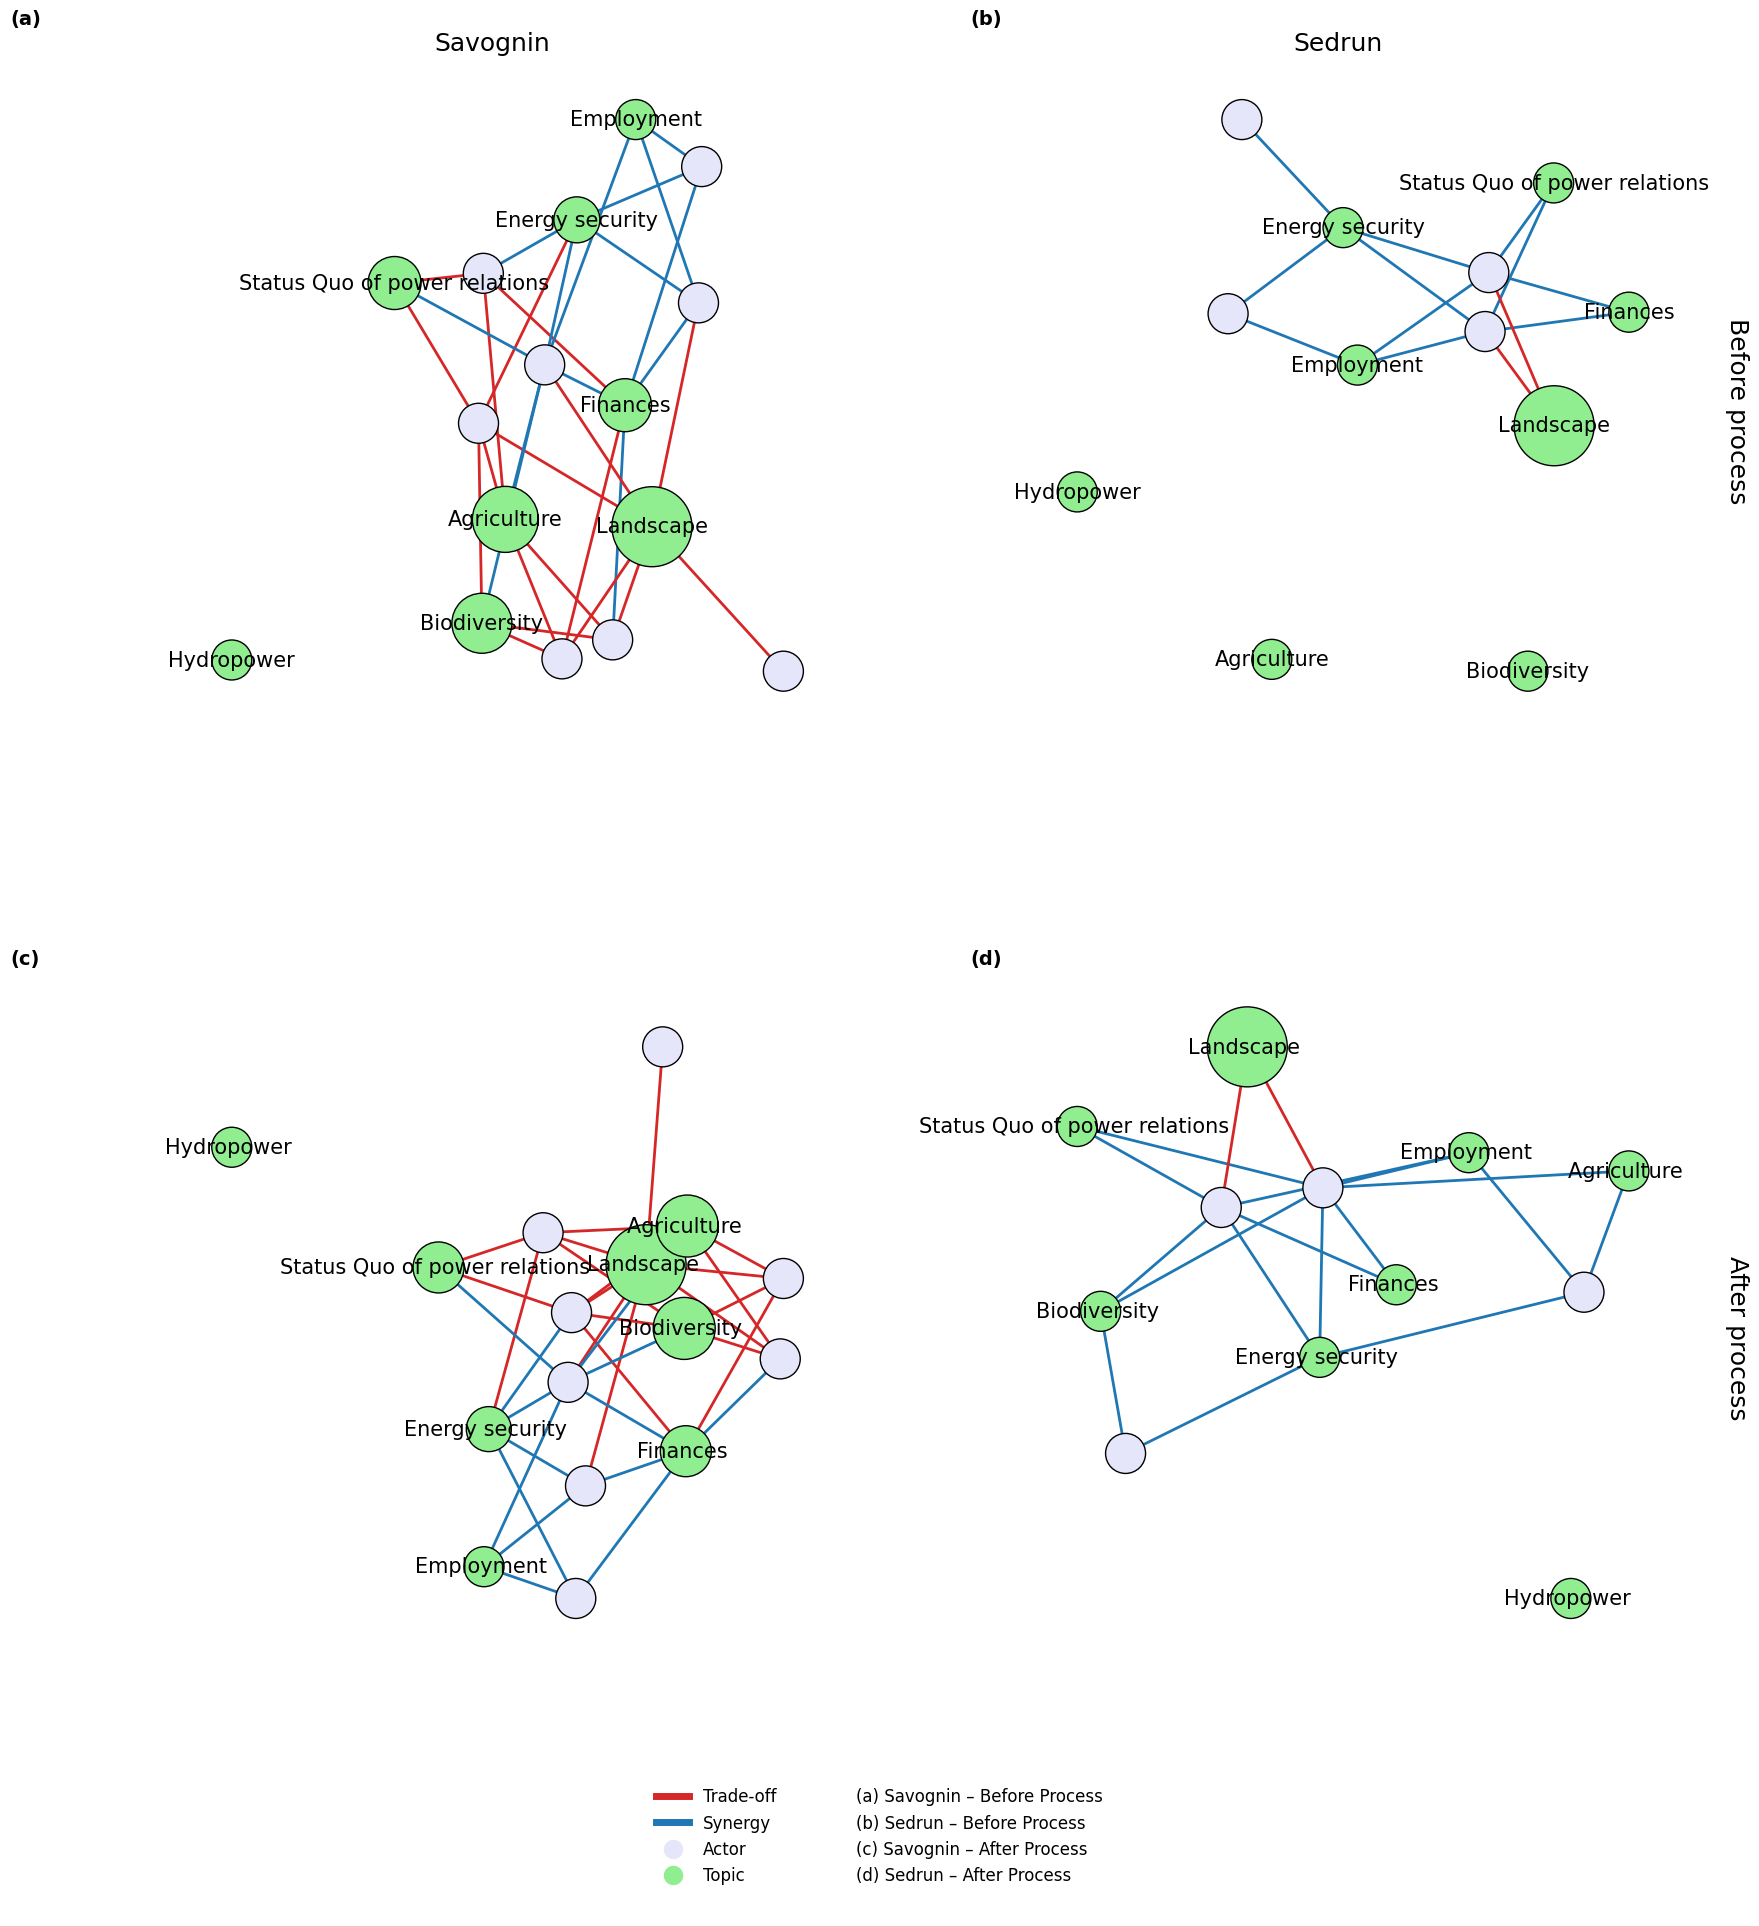

In [ ]:
# Figure 1, Network analysis First order perceptions

# --- Helper functions ---
def clean_topic_names(topic_names):
    return [name.replace(" (before process)", "").replace(" (after process)", "") for name in topic_names]

def create_network(incidence_matrix, actor_names, topic_names, ax):
    n_actors = len(actor_names)
    n_topics = len(topic_names)
    cleaned_topic_names = clean_topic_names(topic_names)

    g = ig.Graph(directed=False)
    g.add_vertices(n_actors + n_topics)

    # Set vertex names (actors as "Actor 1", "Actor 2", etc.)
    actor_ids = [f"Actor {i + 1}" for i in range(n_actors)]
    g.vs["name"] = actor_ids + cleaned_topic_names

    # Add edges
    for i in range(n_actors):
        for j in range(n_topics):
            val = incidence_matrix[i, j]
            if val in [0, 1]:
                g.add_edge(i, n_actors + j)

    # Edge colors
    edge_colors = []
    for i in range(n_actors):
        for j in range(n_topics):
            val = incidence_matrix[i, j]
            if val == 1:
                edge_colors.append('#d62728')  # Conflict
            elif val == 0:
                edge_colors.append('#1f77b4')  # Synergy

    # Node sizes
    actor_size = 40
    topic_tradeoffs = np.sum(incidence_matrix == 1, axis=0)
    normalized_tradeoffs = topic_tradeoffs / np.max(topic_tradeoffs) if np.max(topic_tradeoffs) > 0 else topic_tradeoffs
    topic_sizes = 40 + normalized_tradeoffs * 40
    node_sizes = [actor_size] * n_actors + topic_sizes.tolist()
    node_colors = ['lavender'] * n_actors + ['lightgreen'] * n_topics

    # Layout
    layout = g.layout_fruchterman_reingold()
    layout_coords = np.array(layout.coords)
    # layout_coords += np.random.normal(scale=5, size=layout_coords.shape)
    layout_coords *= max(node_sizes) * 1.5

# Kein zusätzliches Rauschen oder Skalieren mehr nötig


    # Normalize to 1000x1000 space
    x_coords, y_coords = layout_coords[:, 0], layout_coords[:, 1]
    x_min, x_max = x_coords.min(), x_coords.max()
    y_min, y_max = y_coords.min(), y_coords.max()
    margin = 50
    x_range = x_max - x_min
    y_range = y_max - y_min
    layout_coords[:, 0] = ((x_coords - x_min) / x_range) * (1000 - 2 * margin) + margin
    layout_coords[:, 1] = ((y_coords - y_min) / y_range) * (1000 - 2 * margin) + margin
    layout_coords *= 1.3  # Optional scale

    # Plot
    ax.set_aspect("equal")
    ax.axis("off")
    ig.plot(
        g,
        layout=layout_coords.tolist(),
        target=ax,
        vertex_size=node_sizes,
        vertex_color=node_colors,
        edge_color=edge_colors,
        edge_width=2,
        bbox=(0, 0, 1000, 1000),
        margin=0
    )

    # Add labels only for topics
    for i in range(len(actor_ids), len(g.vs)):
        v = g.vs[i]
        ax.text(layout_coords[i][0], layout_coords[i][1], v["name"], fontsize=15,
              ha='center', va='center')



# --- Plot Setup ---
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Each panel data: (df, actor list)
data = [
    (savognin_before, savognin_df.index),  # (a)
    (sedrun_before, sedrun_df.index),     # (b)
    (savognin_after, savognin_df.index),  # (c)
    (sedrun_after, sedrun_df.index)       # (d)
]

labels = ['(a)', '(b)', '(c)', '(d)']
label_positions = {
    '(a)': (0.06, 0.95),
    '(b)': (0.54, 0.95),
    '(c)': (0.06, 0.48),
    '(d)': (0.54, 0.48)
}

# --- Draw each subplot ---
for ax, (df_part, actor_index), label in zip(axs.flat, data, labels):
    if df_part is not None:
        create_network(df_part.to_numpy(), list(actor_index), df_part.columns, ax)
    else:
        ax.text(0.5, 0.5, "No data", ha='center', fontsize=14)
        ax.axis("off")

# Add panel labels
for label, (x, y) in label_positions.items():
    fig.text(x, y, label, fontsize=14, fontweight='bold')

# --- Combined Legend ---
legend_elements = [
    Line2D([0], [0], color='#d62728', lw=5, label='Trade-off'),
    Line2D([0], [0], color='#1f77b4', lw=5, label='Synergy'),
    Line2D([0], [0], marker='o', color='w', label='Actor', markerfacecolor='lavender', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Topic', markerfacecolor='lightgreen', markersize=15),
    Line2D([0], [0], color='none', label=''),
    Line2D([0], [0], color='none', label='(a) Savognin – Before Process'),
    Line2D([0], [0], color='none', label='(b) Sedrun – Before Process'),
    Line2D([0], [0], color='none', label='(c) Savognin – After Process'),
    Line2D([0], [0], color='none', label='(d) Sedrun – After Process'),
]


# Titles and annotations
axs[0, 0].set_title("Savognin", fontsize=18)
axs[0, 1].set_title("Sedrun", fontsize=18)

axs[0, 1].text(1.05, 0.5, "Before process", transform=axs[0, 1].transAxes,
               fontsize=18, va='center', rotation=270)
axs[1, 1].text(1.05, 0.5, "After process", transform=axs[1, 1].transAxes,
               fontsize=18, va='center', rotation=270)

plt.subplots_adjust(hspace=0.2, wspace=0.2, bottom=0.1, top=0.95)
fig.legend(handles=legend_elements, loc='lower center', ncol=2, frameon=False, fontsize=12)

plt.savefig("Network_analysis_V7.pdf")
plt.show()


In [ ]:
# Figure 2, quantitative barcharts (data preparation)

def select_rows_not_matching_actor_name(df, actor_name):
    actor_col = df.columns[0]
    if actor_col not in df.columns:
        print(f"⚠️ Column '{actor_col}' not found in dataframe")
        return None

    # Compare lowercase, stripped names
    filtered = df[df[actor_col].astype(str).str.lower().str.strip() != actor_name.lower().strip()]
    return filtered if not filtered.empty else None


def process_non_matching_rows(file_list, base_dir):
    selected_rows = []
    for file in file_list:
        try:
            file_path = os.path.join(base_dir, file)
            df = pd.read_excel(file_path)

            actor_name_raw = extract_actor_name(file)
            actor_name = simplify_actor_name(actor_name_raw)

            selected_row = select_rows_not_matching_actor_name(df, actor_name)
            if selected_row is not None:
                selected_rows.append(selected_row)

        except Exception as e:
            print(f"⚠️ Failed to process {file}: {e}")

    if selected_rows:
        return pd.concat(selected_rows, axis=0, ignore_index=True)
    else:
        print("⚠️ No non-matching rows found.")
        return pd.DataFrame()  # Return empty DataFrame


# Define base directories if not yet defined
savognin_base_dir = '/content/Savognin'
sedrun_base_dir = '/content/Sedrun'

# Process both locations
first_order_df_not_matching_savognin = process_non_matching_rows(list_cleaned_savognin, savognin_base_dir)
first_order_df_not_matching_sedrun   = process_non_matching_rows(list_cleaned_sedrun, sedrun_base_dir)

# Display results
print("✅ Rows not matching actor names for Savognin:")
display(first_order_df_not_matching_savognin)

print("✅ Rows not matching actor names for Sedrun:")
display(first_order_df_not_matching_sedrun)

# Count rows by original DataFrame index
actor_row_counts_savognin = first_order_df_not_matching_savognin.groupby(first_order_df_not_matching_savognin.index).size()
actor_row_counts_sedrun   = first_order_df_not_matching_sedrun.groupby(first_order_df_not_matching_sedrun.index).size()


✅ Rows not matching actor names for Savognin:


,Actor 1,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),...,Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process),Actor 2,Actor 3_a,Actor 3_b,Actor 3_c,Actor 4,Actor 6,Actor 8
0,Actor 2,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,...,NA,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Actor 3,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,...,NA,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Actor 4,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,...,NA,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Actor 5,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,...,NA,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Actor 6,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,...,NA,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Actor 7,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,...,NA,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Actor 8,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,...,NA,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NA,1.0,1,NaN,NA,NaN,NA,NaN,...,NA,NaN,NA,Actor 1,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,...,NA,NaN,NA,Actor 3,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,...,NA,NaN,NA,Actor 4,NaN,NaN,NaN,NaN,NaN,NaN


✅ Rows not matching actor names for Sedrun:


,Actor 1,Biodiversity (before process),Biodiversity (after process),Landscape (before process),Landscape (after process),Agriculture (before process),Agriculture (after process),Hydropower (before process),Hydropower (after process),Energy security (before process),Energy security (after process),Finances (before process),Finances (after process),Employment (before process),Employment (after process),Status Quo of power relations (before process),Status Quo of power relations (after process),Actor 3,Actor 4,Actor 5
0,Actor 2,NaN,NaN,NaN,NaN,1.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Actor 3,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NaN,NaN
2,Actor 4,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NaN,NaN
3,Actor 5,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NaN,NaN
4,Actor 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NA,NaN,NaN,NaN
5,Actor 7,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NaN,NaN
6,Actor 8,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NA,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Actor 1,NaN,NaN
8,NaN,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Actor 2,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Actor 4,NaN,NaN


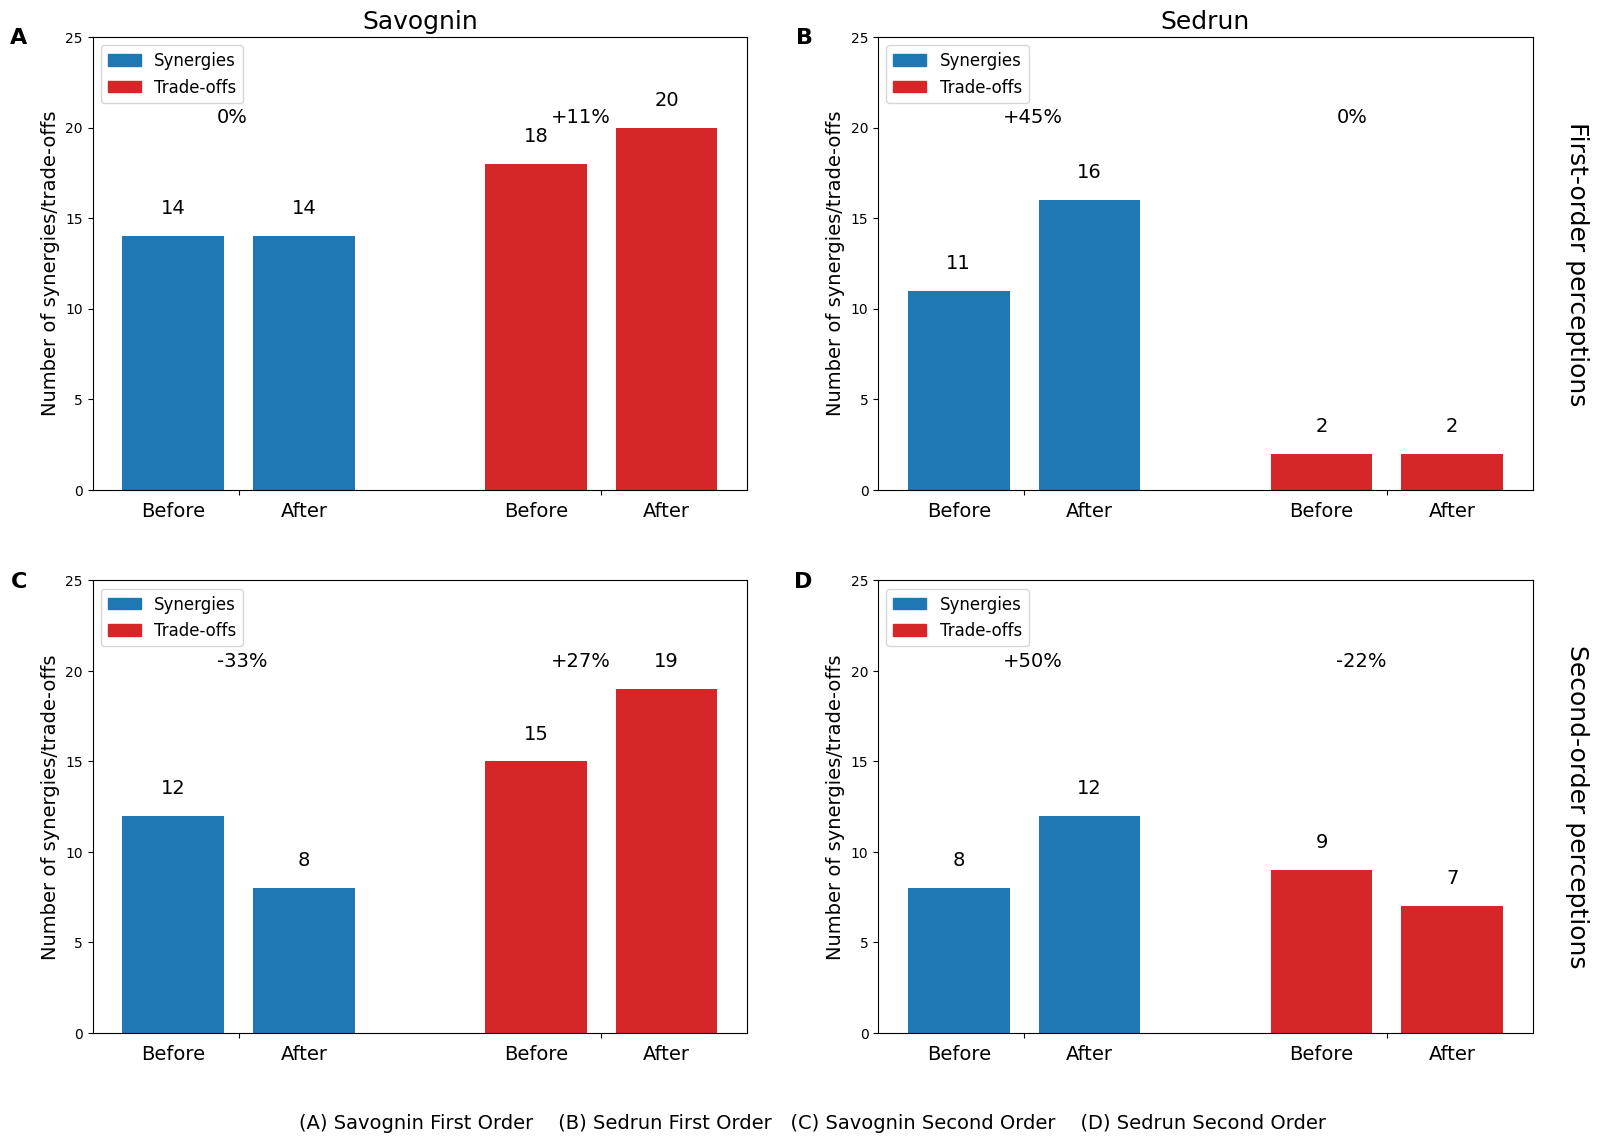

In [ ]:
# Figure 2, quantitative barcharts with number of trade-offs and synergies

def calculate_tradeoffs_and_synergies(df):
    tradeoffs = (df == 1).sum(axis=1)
    synergies = (df == 0).sum(axis=1)
    return tradeoffs, synergies

def percentage_change(before, after):
    if before == 0:
        return np.nan
    return ((after - before) / before) * 100

def format_percentage_change(change):
    if np.isnan(change): return "N/A"
    return f"{'+' if change > 0 else ''}{change:.0f}%" if change != 0 else "0%"

def process_data(df, label=""):
    list_before = [col for col in df.columns if "before process" in col]
    list_after = [col for col in df.columns if "after process" in col]
    before = df[list_before] if list_before else pd.DataFrame()
    after = df[list_after] if list_after else pd.DataFrame()

    if not before.empty:
        tradeoffs_before, synergies_before = calculate_tradeoffs_and_synergies(before)
    else:
        tradeoffs_before = synergies_before = pd.Series(dtype=int)

    if not after.empty:
        tradeoffs_after, synergies_after = calculate_tradeoffs_and_synergies(after)
    else:
        tradeoffs_after = synergies_after = pd.Series(dtype=int)

    synergies_vals = [synergies_before.sum(), synergies_after.sum()]
    tradeoffs_vals = [tradeoffs_before.sum(), tradeoffs_after.sum()]
    pct_synergies = percentage_change(*synergies_vals)
    pct_tradeoffs = percentage_change(*tradeoffs_vals)

    return synergies_vals, tradeoffs_vals, pct_synergies, pct_tradeoffs

def plot_synergy_tradeoff(ax, synergies, tradeoffs, pct_synergies, pct_tradeoffs, colors, label=""):
    positions = [0, 0.45, 1.25, 1.7]
    values = [synergies[0], synergies[1], tradeoffs[0], tradeoffs[1]]

    bars = ax.bar(positions, values, color=colors, width=0.35)

    for bar in bars:
        y = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, y + 1, f'{y:.0f}', ha='center', va='bottom', fontsize=14)

    ax.set_ylabel('Number of synergies/trade-offs', fontsize=14)
    ax.set_xticks([0.225, 1.475])
    ax.set_xticklabels(['', ''])
    ax.set_ylim(0, 25)
    ax.text(0, -1.5, 'Before', ha='center', fontsize=14)
    ax.text(0.45, -1.5, 'After', ha='center', fontsize=14)
    ax.text(1.25, -1.5, 'Before', ha='center', fontsize=14)
    ax.text(1.7, -1.5, 'After', ha='center', fontsize=14)

    ax.annotate(format_percentage_change(pct_synergies), xy=(0.19, 0.81), xycoords='axes fraction', fontsize=14)
    ax.annotate(format_percentage_change(pct_tradeoffs), xy=(0.70, 0.81), xycoords='axes fraction', fontsize=14)

    # Add subplot label (A, B, C, D)
    ax.text(-0.1, 1.02, label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

    # Add legend once per subplot
    ax.legend(handles=[
        Patch(color="#1f77b4", label="Synergies"),
        Patch(color="#d62728", label="Trade-offs")
    ], loc='upper left', fontsize=12)

# --- Colors ---
colors = ["#1f77b4", "#1f77b4", "#d62728", "#d62728"]

# --- Data Processing ---

# First-order
s1, t1, pct_s1, pct_t1 = process_data(savognin_df, "Savognin")
s2, t2, pct_s2, pct_t2 = process_data(sedrun_df, "Sedrun")

# Second-order
s3, t3, pct_s3, pct_t3 = process_data(first_order_df_not_matching_savognin, "Savognin")
s4, t4, pct_s4, pct_t4 = process_data(first_order_df_not_matching_sedrun, "Sedrun")


# --- Plotting ---
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.1)  # Reserve bottom space

# Plotting (unchanged)
plot_synergy_tradeoff(axs[0, 0], s1, t1, pct_s1, pct_t1, colors, label="A")
plot_synergy_tradeoff(axs[0, 1], s2, t2, pct_s2, pct_t2, colors, label="B")
plot_synergy_tradeoff(axs[1, 0], s3, t3, pct_s3, pct_t3, colors, label="C")
plot_synergy_tradeoff(axs[1, 1], s4, t4, pct_s4, pct_t4, colors, label="D")

# Titles and annotations
axs[0, 0].set_title("Savognin", fontsize=18)
axs[0, 1].set_title("Sedrun", fontsize=18)

axs[0, 1].text(1.05, 0.5, "First-order perceptions", transform=axs[0, 1].transAxes,
               fontsize=18, va='center', rotation=270)
axs[1, 1].text(1.05, 0.5, "Second-order perceptions", transform=axs[1, 1].transAxes,
               fontsize=18, va='center', rotation=270)

# Subplot identifier legend
fig.text(0.5, 0.02,  # Moved up slightly to avoid cutoff
         "(A) Savognin First Order    (B) Sedrun First Order   (C) Savognin Second Order    (D) Sedrun Second Order",
         ha='center', fontsize=14)

plt.savefig("Perceptions_Multipanelfigure7.pdf", bbox_inches='tight')
plt.show()


In [ ]:
# Figure 1, Network analysis First order perceptions

# --- Helper functions ---
def clean_topic_names(topic_names):
    return [name.replace(" (before process)", "").replace(" (after process)", "") for name in topic_names]

def create_network(incidence_matrix, actor_names, topic_names, ax):
    n_actors = len(actor_names)
    n_topics = len(topic_names)
    cleaned_topic_names = clean_topic_names(topic_names)

    g = ig.Graph(directed=False)
    g.add_vertices(n_actors + n_topics)
    g.vs["name"] = list(actor_names) + cleaned_topic_names

    for i in range(n_actors):
        for j in range(n_topics):
            val = incidence_matrix[i, j]
            if val in [0, 1]:
                g.add_edge(i, n_actors + j)

    # Edge colors
    edge_colors = []
    for i in range(n_actors):
        for j in range(n_topics):
            val = incidence_matrix[i, j]
            if val == 1:
                edge_colors.append('#d62728')  # Conflict
            elif val == 0:
                edge_colors.append('#1f77b4')  # Synergy

    # Smaller node sizes for clarity
    actor_size = 40  # or 50 if you prefer slightly bigger actors
    topic_tradeoffs = np.sum(incidence_matrix == 1, axis=0)

    # Apply logarithmic scaling to topic trade-offs
    with np.errstate(divide='ignore'):
        log_tradeoffs = np.log1p(topic_tradeoffs)  # log1p avoids log(0)

# Normalize the log values
    if np.max(log_tradeoffs) > 0:
       normalized_log_tradeoffs = log_tradeoffs / np.max(log_tradeoffs)
    else:
        normalized_log_tradeoffs = log_tradeoffs  # avoid divide-by-zero

# Scale topic sizes with lower boost range to reduce dominance
    topic_sizes = 30 + normalized_log_tradeoffs * 40  # Base size + scaled log boost

    node_sizes = [actor_size] * n_actors + topic_sizes.tolist()

    node_colors = ['lavender'] * n_actors + ['lightgreen'] * n_topics

    # Use Kamada-Kawai layout for good spacing
    layout = g.layout_kamada_kawai()
    layout_coords = np.array(layout.coords)

    # Add small jitter to spread overlapping nodes
    layout_coords += np.random.normal(scale=5, size=layout_coords.shape)

    # Compute scale factor based on node sizes to avoid overlap
    max_node_size = max(node_sizes)
    min_spacing = max_node_size * 1.5  # minimum spacing between nodes

    # Scale up layout so that nodes are spaced proportionally to their size
    layout_coords *= min_spacing

    # Center layout inside 1000x1000 plot space
    x_coords, y_coords = layout_coords[:, 0], layout_coords[:, 1]
    x_min, x_max = x_coords.min(), x_coords.max()
    y_min, y_max = y_coords.min(), y_coords.max()

    # Compute range and apply normalization with margin
    margin = 50  # pixels of margin around network
    x_range = x_max - x_min
    y_range = y_max - y_min

    layout_coords[:, 0] = ((x_coords - x_min) / x_range) * (1000 - 2 * margin) + margin
    layout_coords[:, 1] = ((y_coords - y_min) / y_range) * (1000 - 2 * margin) + margin


    # Separate actor and topic node coordinates
    topic_coords = layout_coords[n_actors:]
    actor_coords = layout_coords[:n_actors]

    # Define a minimum distance between topic nodes
    min_distance = 80  # Adjust as needed

    # Compute pairwise distances between topic nodes
    dist_matrix = squareform(pdist(topic_coords))

    # Slightly adjust positions to enforce spacing
    for i in range(len(topic_coords)):
        for j in range(i + 1, len(topic_coords)):
            distance = dist_matrix[i, j]
            if distance < min_distance and distance > 0:
                # Push nodes away from each other proportionally
                direction = topic_coords[i] - topic_coords[j]
                norm = np.linalg.norm(direction)
                if norm == 0:
                    direction = np.random.normal(size=2)
                    norm = np.linalg.norm(direction)
                direction /= norm
                shift = (min_distance - distance) / 2 * direction
                topic_coords[i] += shift
                topic_coords[j] -= shift

    # Recombine updated layout
    layout_coords = np.vstack([actor_coords, topic_coords])


    # Optional: Further scale the layout by a factor to make the network bigger
    scale_factor = 1.3  # Increase this to further enlarge the network (up to 30% more)
    layout_coords *= scale_factor

    # Plot the graph with dynamic space use
    ax.set_aspect("equal")
    ax.axis("off")

    ig.plot(
        g,
        layout=layout_coords.tolist(),
        target=ax,
        vertex_size=node_sizes,
        vertex_color=node_colors,
        edge_color=edge_colors,
        edge_width=2,
        bbox=(0, 0, 1000, 1000),  # Matches normalized layout
        margin=0
    )

    # Add labels
    for i, v in enumerate(g.vs):
        ax.text(layout_coords[i][0], layout_coords[i][1], v["name"], fontsize=13,
                ha='center', va='center')

# --- Plot Setup ---
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Each panel data: (df, actor list)
data = [
    (savognin_before, savognin_df.index),  # (a)
    (sedrun_before, sedrun_df.index),     # (b)
    (savognin_after, savognin_df.index),  # (c)
    (sedrun_after, sedrun_df.index)       # (d)
]

labels = ['(a)', '(b)', '(c)', '(d)']
label_positions = {
    'A': (0.06, 0.95),
    'B': (0.54, 0.95),
    'C': (0.06, 0.48),
    'D': (0.54, 0.48)
}

# --- Draw each subplot ---
for ax, (df_part, actor_index), label in zip(axs.flat, data, labels):
    if df_part is not None:
        create_network(df_part.to_numpy(), list(actor_index), df_part.columns, ax)
    else:
        ax.text(0.5, 0.5, "No data", ha='center', fontsize=14)
        ax.axis("off")

# Add panel labels
for label, (x, y) in label_positions.items():
    fig.text(x, y, label, fontsize=14, fontweight='bold')

# --- Combined Legend ---
legend_elements = [
    Line2D([0], [0], color='#d62728', lw=5, label='Trade-off'),
    Line2D([0], [0], color='#1f77b4', lw=5, label='Synergy'),
    Line2D([0], [0], marker='o', color='w', label='Actor', markerfacecolor='lavender', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Topic', markerfacecolor='lightgreen', markersize=15),
    Line2D([0], [0], color='none', label=''),
    Line2D([0], [0], color='none', label='(A) Savognin – Before Process'),
    Line2D([0], [0], color='none', label='(B) Sedrun – Before Process'),
    Line2D([0], [0], color='none', label='(C) Savognin – After Process'),
    Line2D([0], [0], color='none', label='(D) Sedrun – After Process'),
]

# --- Layout Adjustments ---
plt.subplots_adjust(hspace=0.2, wspace=0.2, bottom=0.1, top=0.95)
fig.legend(handles=legend_elements, loc='lower center', ncol=2, frameon=False, fontsize=12)

plt.savefig("Network_analysis_V5.pdf")
plt.show()

NameError: name 'plt' is not defined

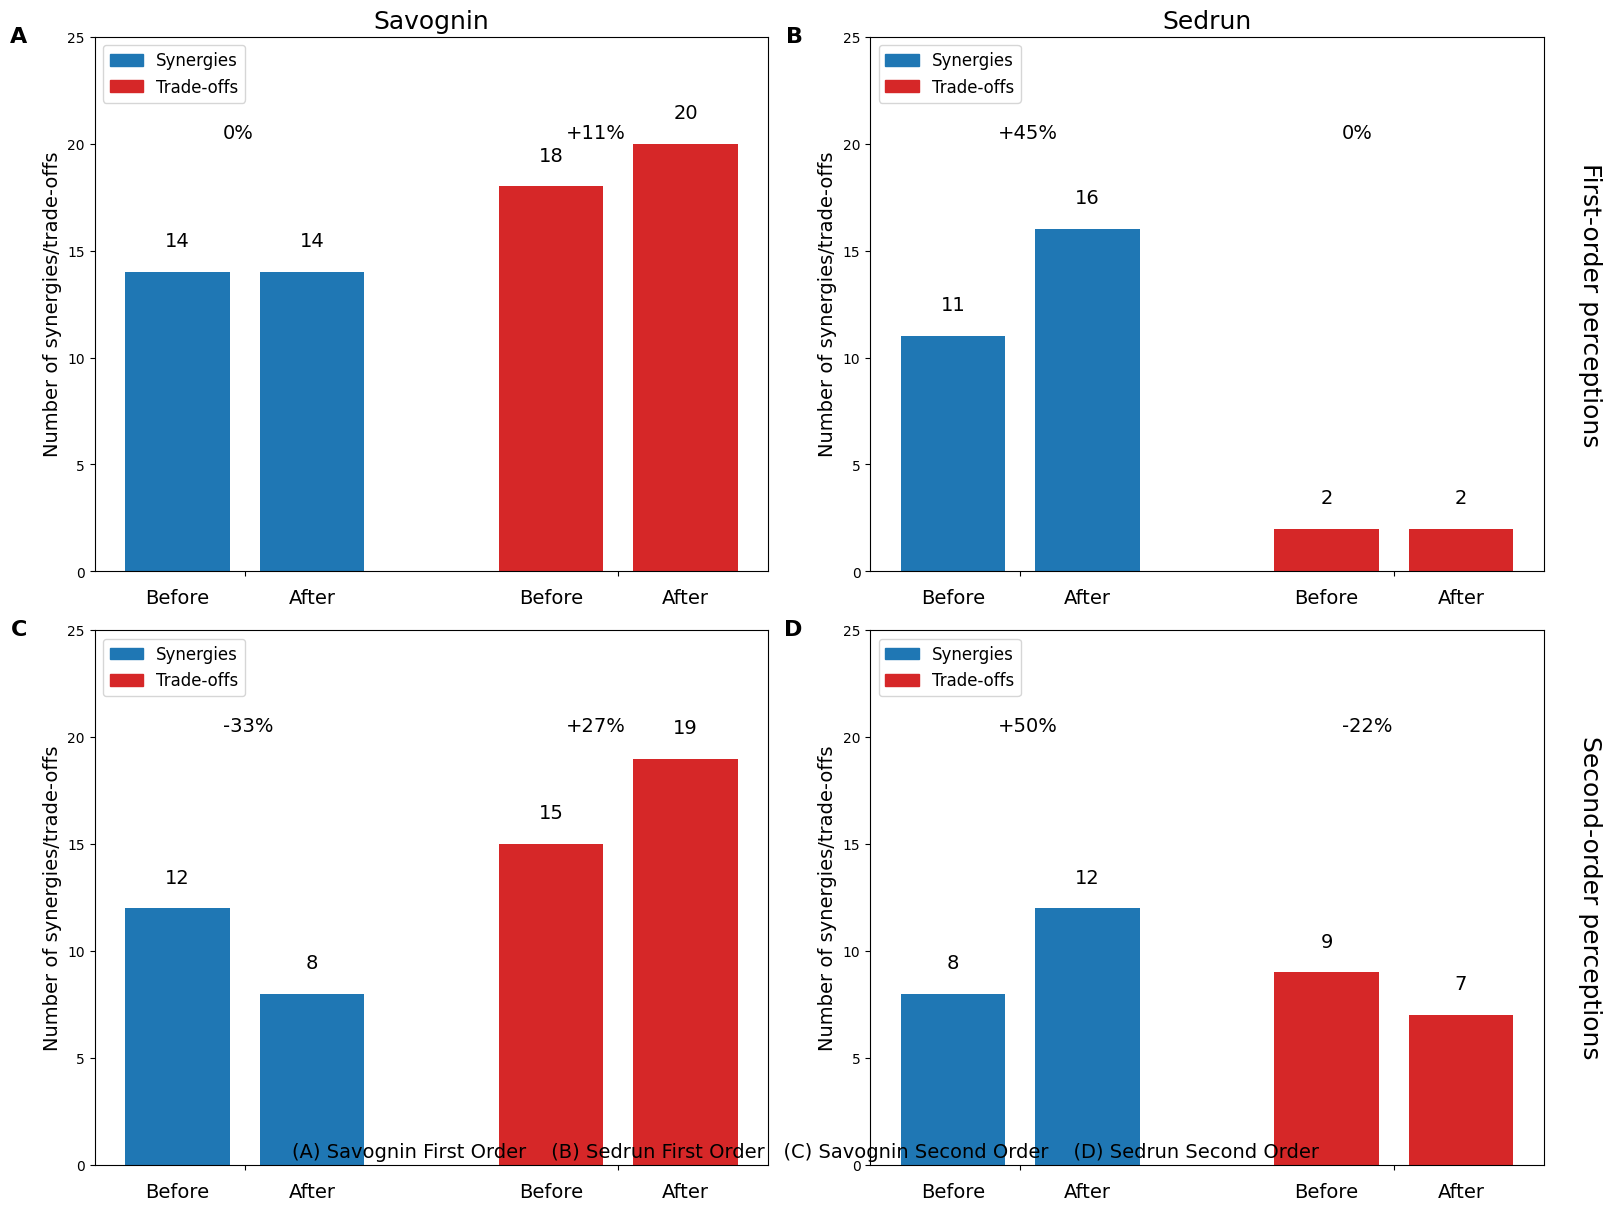

In [ ]:
# Figure 2, quantitative barcharts with number of trade-offs and synergies

def calculate_tradeoffs_and_synergies(df):
    tradeoffs = (df == 1).sum(axis=1)
    synergies = (df == 0).sum(axis=1)
    return tradeoffs, synergies

def percentage_change(before, after):
    if before == 0:
        return np.nan
    return ((after - before) / before) * 100

def format_percentage_change(change):
    if np.isnan(change): return "N/A"
    return f"{'+' if change > 0 else ''}{change:.0f}%" if change != 0 else "0%"

def process_data(df, label=""):
    list_before = [col for col in df.columns if "before process" in col]
    list_after = [col for col in df.columns if "after process" in col]
    before = df[list_before] if list_before else pd.DataFrame()
    after = df[list_after] if list_after else pd.DataFrame()

    if not before.empty:
        tradeoffs_before, synergies_before = calculate_tradeoffs_and_synergies(before)
    else:
        tradeoffs_before = synergies_before = pd.Series(dtype=int)

    if not after.empty:
        tradeoffs_after, synergies_after = calculate_tradeoffs_and_synergies(after)
    else:
        tradeoffs_after = synergies_after = pd.Series(dtype=int)

    synergies_vals = [synergies_before.sum(), synergies_after.sum()]
    tradeoffs_vals = [tradeoffs_before.sum(), tradeoffs_after.sum()]
    pct_synergies = percentage_change(*synergies_vals)
    pct_tradeoffs = percentage_change(*tradeoffs_vals)

    return synergies_vals, tradeoffs_vals, pct_synergies, pct_tradeoffs

def plot_synergy_tradeoff(ax, synergies, tradeoffs, pct_synergies, pct_tradeoffs, colors, label=""):
    positions = [0, 0.45, 1.25, 1.7]
    values = [synergies[0], synergies[1], tradeoffs[0], tradeoffs[1]]

    bars = ax.bar(positions, values, color=colors, width=0.35)

    for bar in bars:
        y = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, y + 1, f'{y:.0f}', ha='center', va='bottom', fontsize=14)

    ax.set_ylabel('Number of synergies/trade-offs', fontsize=14)
    ax.set_xticks([0.225, 1.475])
    ax.set_xticklabels(['', ''])
    ax.set_ylim(0, 25)
    ax.text(0, -1.5, 'Before', ha='center', fontsize=14)
    ax.text(0.45, -1.5, 'After', ha='center', fontsize=14)
    ax.text(1.25, -1.5, 'Before', ha='center', fontsize=14)
    ax.text(1.7, -1.5, 'After', ha='center', fontsize=14)

    ax.annotate(format_percentage_change(pct_synergies), xy=(0.19, 0.81), xycoords='axes fraction', fontsize=14)
    ax.annotate(format_percentage_change(pct_tradeoffs), xy=(0.70, 0.81), xycoords='axes fraction', fontsize=14)

    # Add subplot label (A, B, C, D)
    ax.text(-0.1, 1.02, label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

    # Add legend once per subplot
    ax.legend(handles=[
        Patch(color="#1f77b4", label="Synergies"),
        Patch(color="#d62728", label="Trade-offs")
    ], loc='upper left', fontsize=12)

# --- Colors ---
colors = ["#1f77b4", "#1f77b4", "#d62728", "#d62728"]

# --- Data Processing ---

# First-order
s1, t1, pct_s1, pct_t1 = process_data(savognin_df, "Savognin")
s2, t2, pct_s2, pct_t2 = process_data(sedrun_df, "Sedrun")

# Second-order
s3, t3, pct_s3, pct_t3 = process_data(first_order_df_not_matching_savognin, "Savognin")
s4, t4, pct_s4, pct_t4 = process_data(first_order_df_not_matching_sedrun, "Sedrun")


# --- Plotting ---
fig, axs = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)

plot_synergy_tradeoff(axs[0, 0], s1, t1, pct_s1, pct_t1, colors, label="A")
plot_synergy_tradeoff(axs[0, 1], s2, t2, pct_s2, pct_t2, colors, label="B")
plot_synergy_tradeoff(axs[1, 0], s3, t3, pct_s3, pct_t3, colors, label="C")
plot_synergy_tradeoff(axs[1, 1], s4, t4, pct_s4, pct_t4, colors, label="D")


axs[0, 0].set_title("Savognin", fontsize=18)
axs[0, 1].set_title("Sedrun", fontsize=18)

axs[0, 1].text(1.05, 0.5, "First-order perceptions", transform=axs[0, 1].transAxes,
               fontsize=18, va='center', rotation=270)
axs[1, 1].text(1.05, 0.5, "Second-order perceptions", transform=axs[1, 1].transAxes,
               fontsize=18, va='center', rotation=270)

# Subplot identifier legend
fig.text(0.5, 0.04,
         "(A) Savognin First Order    (B) Sedrun First Order   (C) Savognin Second Order    (D) Sedrun Second Order",
         ha='center', fontsize=14)

plt.savefig("Perceptions_Multipanelfigure5.pdf")
plt.show()